In [33]:
import sys
sys.path.append('../')
sys.path.append("/home/emastr/phd/")

import numpy as np
from secret.tools import *
from matplotlib import image as im
from util.basis_scaled import ScaleShiftedBasis, BasisProduct, FourBasis

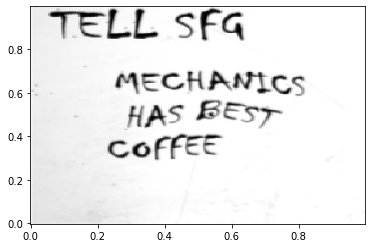

In [38]:
u0 = load_init_state(K=257)
u0.plot(plt.gca(), cmap='gray')

#(u0.diff(0, 1)**2. + u0.diff(1, 0)**2.).plot(plt.gca(), cmap='gray')

In [45]:
u1 = uT.eval_grid()
np.save('/home/emastr/phd/projects/sfg-retreat-23/secret/end.npy', u1)

Running Fourier based solve: [##################  ] (1800/2000 steps, 90%)

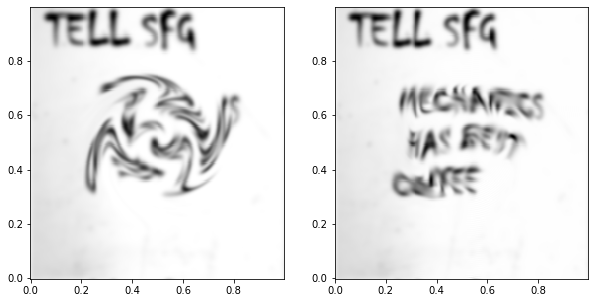

In [40]:
N = 2000
nu = 0.00004
ax, ay = get_a()
uT = solve_slow(u0, ax, ay, nu=nu, N=N)
uTgrid = uT.eval_grid()
uTgrid = uTgrid + np.random.normal(0, 0*1e-5, uTgrid.shape)
uT = to_basis(uTgrid)
#u0T = solve_slow(uT, lambda x, y: -ax(x, y), lambda x,y: -ay(x, y), nu=-nu, N=N)
#u0T = u0T.change_dim(65, 65).change_dim(129, 129)
u0T = solve_slow(uT, lambda x, y: -ax(x, y), lambda x,y: -ay(x, y), nu=-nu/5, N=N)

plt.figure(figsize=(10,5))
plt.subplot(121)
uT.plot(plt.gca(), cmap='gray')
plt.subplot(122)
u0T.plot(plt.gca(), cmap='gray')


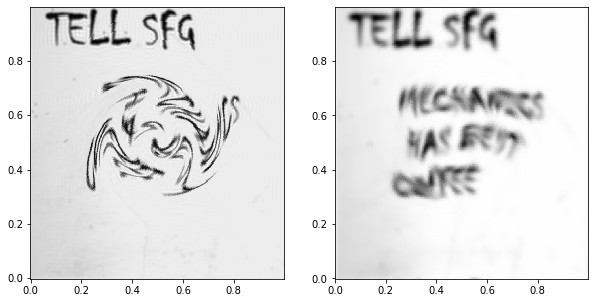

In [36]:
uTf = solve_fast(u0, upsample_factor=2)

u0gd = uTf*0.
for i in range(3):
    u0gd = u0gd - 0.1 * mse_grad(0*u0, uT, upsample_factor=3)

plt.figure(figsize=(10,5))
plt.subplot(121)
uTf.plot(plt.gca(), cmap='gray')
plt.subplot(122)
u0gd.plot(plt.gca(), cmap='gray')


In [37]:

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X, Y = np.meshgrid(x, y)
v_analytic = get_sol_analytic(g, lambda x,y: w(x, y), 1)
v_reverse = get_sol_analytic(v_analytic, lambda x,y: -w(x, y), 1)
v = v_analytic(X, Y)
vBlock = np.vstack([np.hstack([v,v,v]), np.hstack([v,v,v]), np.hstack([v,v,v])])
plt.figure(figsize=(15,15))
plt.imshow(vBlock, cmap="gray")#, vmin=0., vmax=7., cmap="inferno")
plt.xlim([0.8*v.shape[0], 2.2*v.shape[0]])
plt.ylim([0.8*v.shape[0], 2.2*v.shape[0]])
plt.axis("off")

NameError: name 'g' is not defined

In [ ]:
print(f"CFL condition: {N / K**2}")
solve(g, f, bx, by, lam, N, 1, K, callback=save_callback)
v1, v0 =  u_vec[-1], u_vec[0]

CFL condition: 0.07923071211108636


(160.8, 442.20000000000005, 160.8, 442.20000000000005)

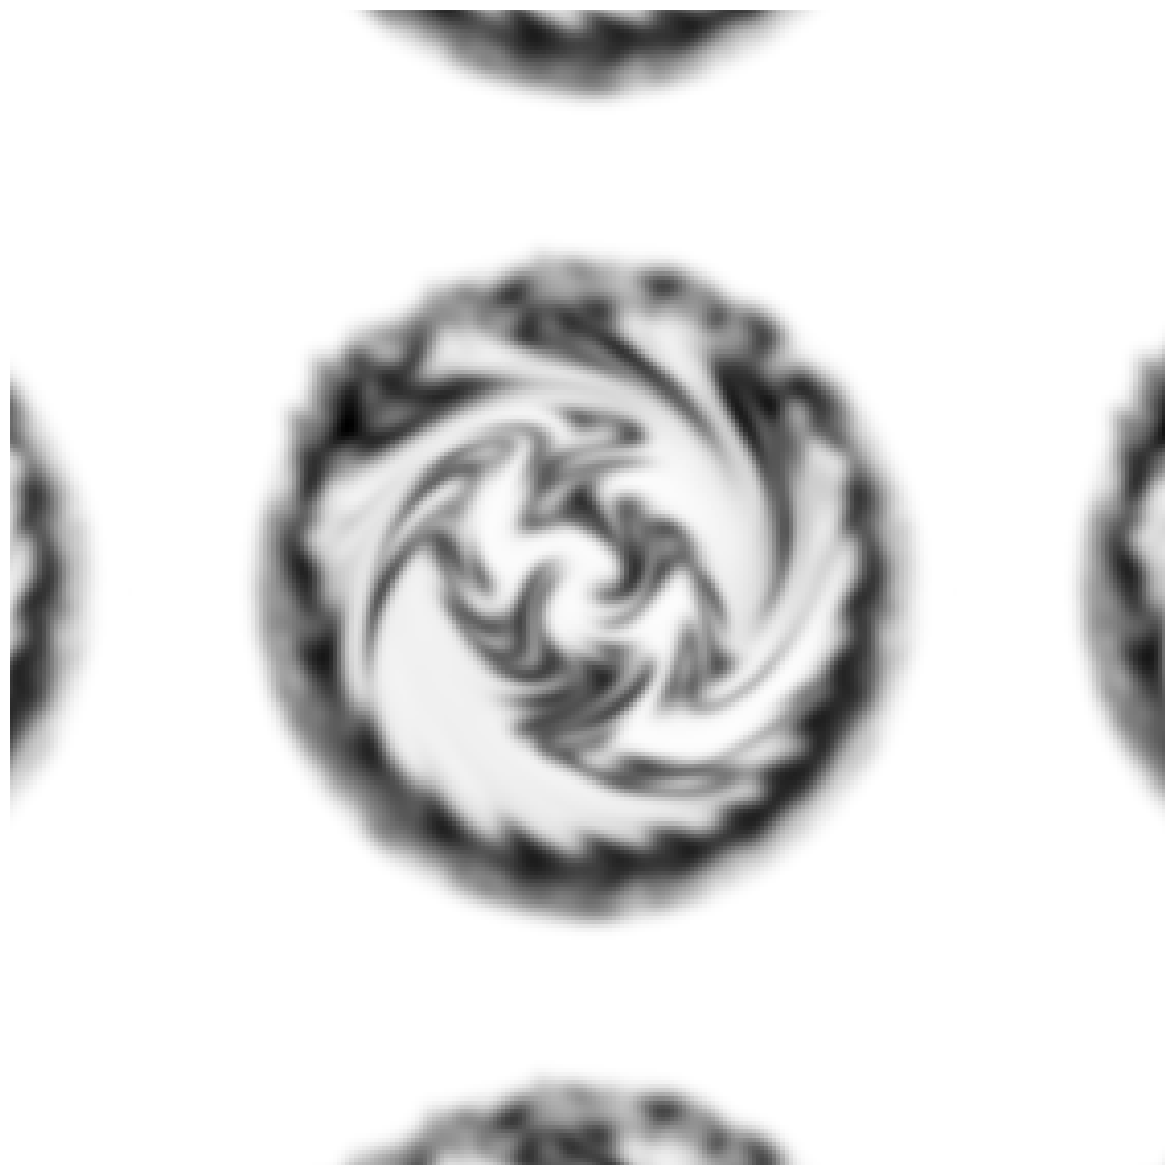

In [ ]:
v = v1
vBlock = np.vstack([np.hstack([v,v,v]), np.hstack([v,v,v]), np.hstack([v,v,v])])
plt.figure(figsize=(15,15))
plt.imshow(vBlock, cmap="gray")#, vmin=0., vmax=7., cmap="inferno")
plt.xlim([0.8*v.shape[0], 2.2*v.shape[0]])
plt.ylim([0.8*v.shape[0], 2.2*v.shape[0]])
plt.axis("off")

(80.0, 220.00000000000003, 80.0, 220.00000000000003)

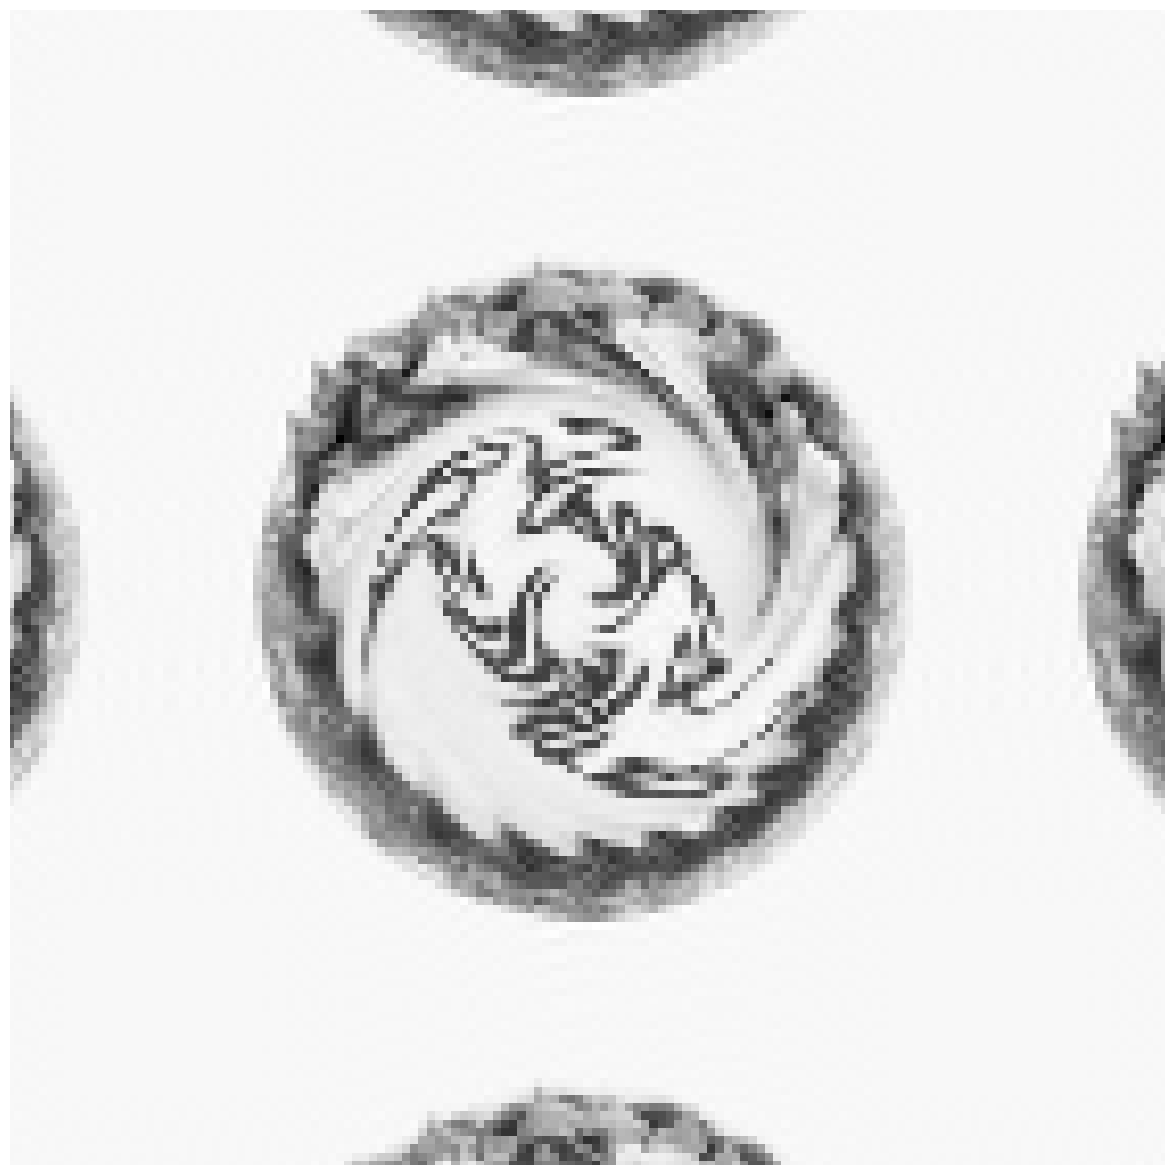

In [ ]:
coef = BasisProduct._interpolate(u_vec[-1], FourBasis, FourBasis)
basis2 = BasisProduct(coef, coef.shape[0], coef.shape[1], FourBasis, FourBasis)
basis2 = basis.change_dim(K, K)

v = get_sol_analytic(lambda x,y: basis2(x.flatten(), y.flatten()).reshape(y.shape), lambda x,y: -w(x, y), 1)(X, Y)
vBlock = np.vstack([np.hstack([v,v,v]), np.hstack([v,v,v]), np.hstack([v,v,v])])
plt.figure(figsize=(15,15))
plt.imshow(vBlock, cmap="gray")#, vmin=0., vmax=7., cmap="inferno")
plt.xlim([0.8*v.shape[0], 2.2*v.shape[0]])
plt.ylim([0.8*v.shape[0], 2.2*v.shape[0]])
plt.axis("off")

### RUN BACKWARDS

In [ ]:
assert False
coef = BasisProduct._interpolate(v1, FourBasis, FourBasis)
basis = BasisProduct(coef, coef.shape[0], coef.shape[1], FourBasis, FourBasis)
basis = basis.change_dim(K, K)


AssertionError: 

In [ ]:
t_vec = []
u_vec = []
N = N_plot * 200 + 1

def save_callback(u_four, t, n):
    """Save the solution at time t, and the time t itself."""
    if n % (N // N_plot) == 0:
        t_vec.append(t)
        u_vec.append(invFourier2D(u_four))
        print(f"t = {t:.2f}, [{n}/{N} = {int(n/N * 100)}% done], ", end="\r")
        
lam = 0.00002
g = lambda x,y: basis.change_dim(K, K).eval_grid()# (dist(x%1-0.5,y%1-0.5) < 0.3) #np.exp(np.sin(2 * np.pi * x) + np.sin(2 * np.pi * y))
bx_rev = lambda x, y: -bx(x, y)  # 3 is nice setting for the test
by_rev = lambda x, y: -by(x, y)

print(f"CFL condition: {N / K**2}")
solve(g, f, bx_rev, by_rev, lam, N, 1, K, callback=save_callback)
v1, v0 =  u_vec[-1], u_vec[0]

CFL condition: 0.07923071211108636


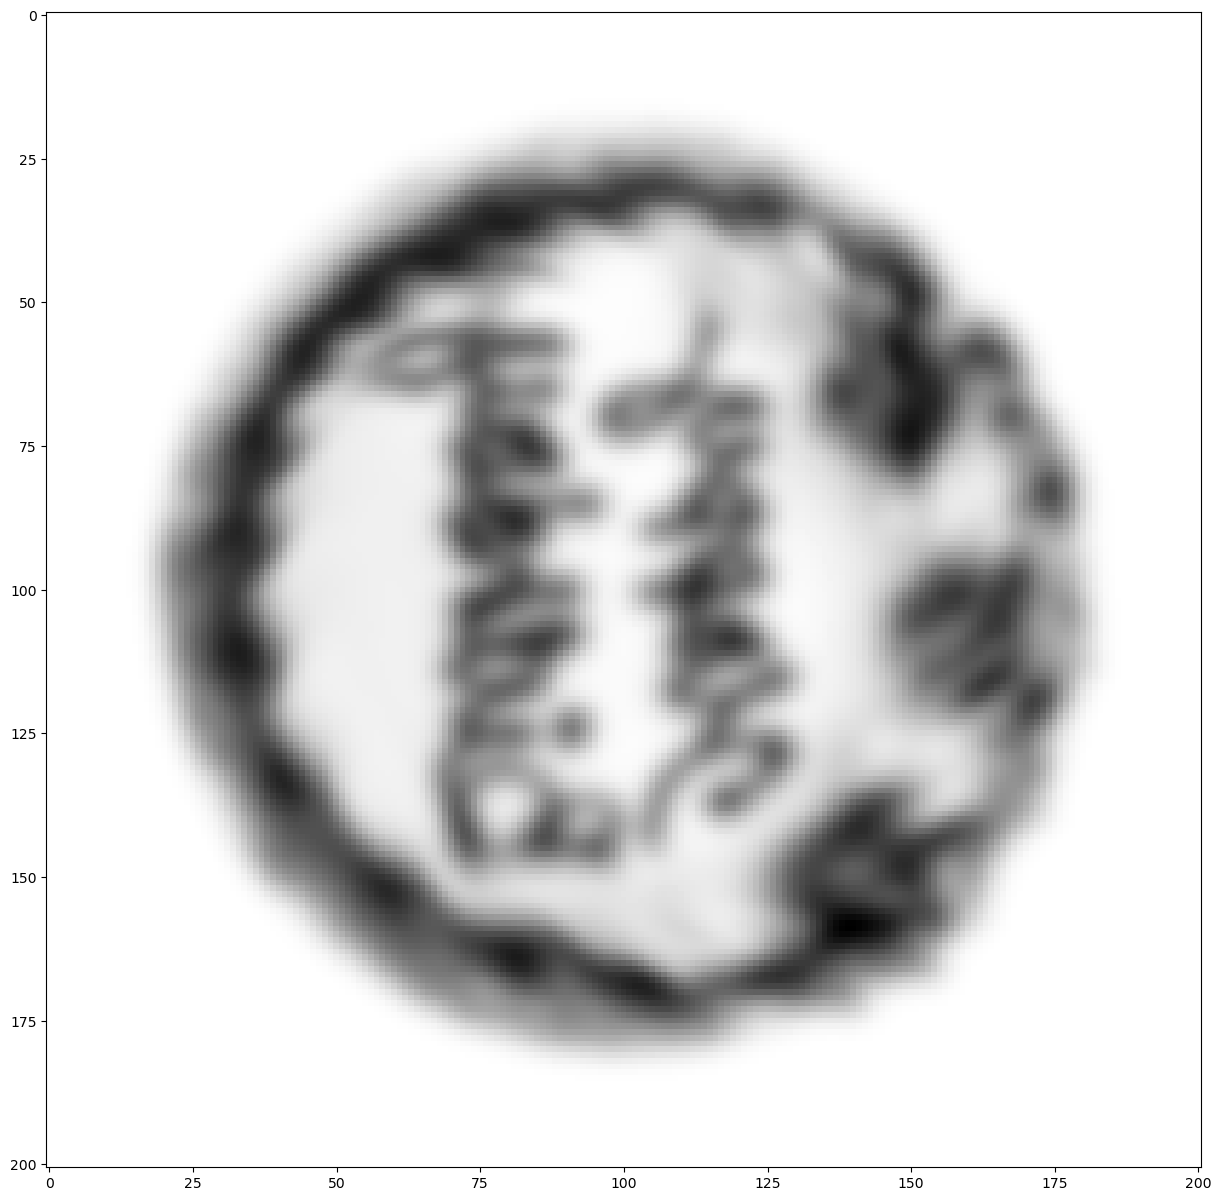

In [ ]:

plt.figure(figsize=(15,15))
plt.imshow(v1[:, ::-1].T, cmap="gray")

## Gradient Descent with Low Resolution Solver

CFL condition: 0.7843348691304775


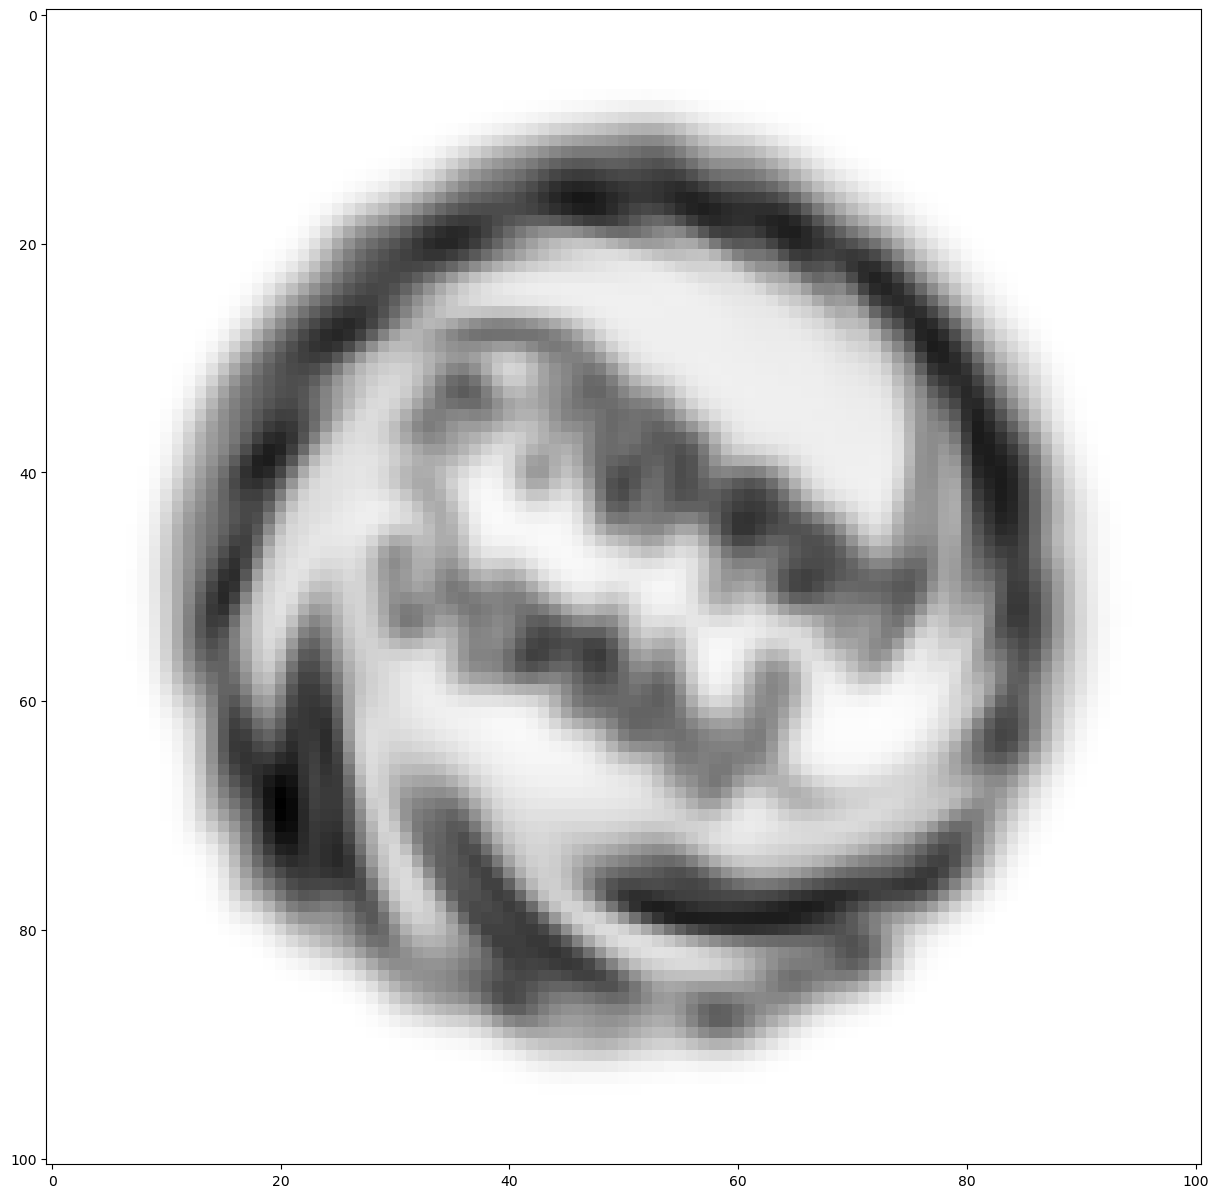

In [ ]:
def solve_low(u0):
    N_plot = 16
    K = 101
    N = N_plot * 500 + 1
    coef = BasisProduct._interpolate(v1, FourBasis, FourBasis)
    basis = BasisProduct(coef, coef.shape[0], coef.shape[1], FourBasis, FourBasis)
    basis = basis.change_dim(K, K)

    g = lambda x,y: basis.change_dim(K, K).eval_grid()
    
    def save_callback(u_four, t, n):
        """Save the solution at time t, and the time t itself."""
        if n % (N // N_plot) == 0:
            print(f"t = {t:.2f}, [{n}/{N} = {int(n/N * 100)}% done], ", end="\r")
            
    lam = 0.00004
    
    print(f"CFL condition: {N / K**2}")
    out = solve(g, f, bx_rev, by_rev, lam, N, 1, K, callback=save_callback)
    return out

vend = solve_low(v0[:, ::-1].T)


plt.figure(figsize=(15,15))
plt.imshow(vend, cmap="gray")
    

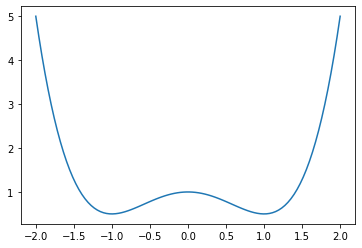

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


def exp_taylor(x, K):
    # taylor series of gaussian: C * (-1)^k * x^(2k) / k!
    return sum([(-1)**k * x ** (2*k) / math.factorial(k) for k in range(K)])

K = 3

x = np.linspace(-2, 2, 100)
plt.plot(x, exp_taylor(x, K))

